importing libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

data collection and processing

In [5]:
#loading the file from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

In [6]:
#head() function prints first 5 rows of the dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
#checking the no of rows and columns in the dataset
car_dataset.shape

(301, 9)

In [8]:
#information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
#checking the no of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
#checking the distribution of categorrical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding categorical data -> ml models cannot understand text, hence we are assigning nos to these categories

In [11]:
#encoding fuel_type column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
#encoding seller_type column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
#encoding transmission column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [12]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


splitting the data and target

In [13]:
x=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y=car_dataset['Selling_Price']

In [14]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [15]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


splitting the data into train data and test data

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

model training

1. linear regression

In [17]:
#loading the linear regression model
lin_reg_model = LinearRegression()

In [18]:
#fit() function is used to train our model
lin_reg_model.fit(x_train,y_train)

LinearRegression()

model evaluation

In [19]:
#prediction on training data
training_data_prediction=lin_reg_model.predict(x_train)

In [20]:
#R squared error
error_score=metrics.r2_score(y_train,training_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.8799451660493711


visualize the actual prices(y_train) and the predicted prices(training_data_prediction)

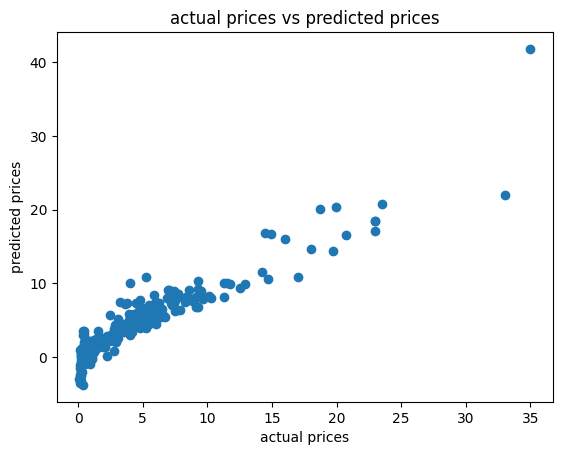

In [21]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted prices")
plt.show()

In [26]:
#prediction on testing data
testing_data_prediction=lin_reg_model.predict(x_test)

In [27]:
m=lin_reg_model.predict([[2017,9.85,6900,0,0,0,0]])
print(m)

[7.07156998]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
#R squared error
error_score=metrics.r2_score(y_test,testing_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.8365766715027051


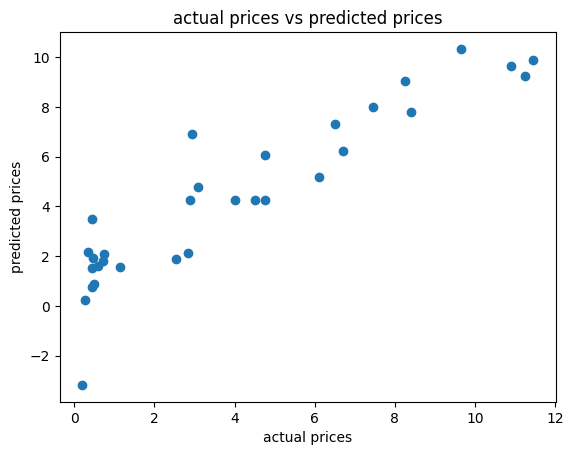

In [29]:
plt.scatter(y_test,testing_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted prices")
plt.show()

2.lasso regression

In [30]:
#loading the linear regression model
lass_reg_model = Lasso()

In [31]:
#fit() function is used to train our model
lass_reg_model.fit(x_train,y_train)

Lasso()

model evaluation

In [32]:
#prediction on training data
training_data_prediction=lass_reg_model.predict(x_train)

In [33]:
m=[[2014,5.59,27000,0,0,0,0]]
print(lass_reg_model.predict(m))

[3.8257306]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [34]:
#R squared error
error_score=metrics.r2_score(y_train,training_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.8427856123435794


visualize the actual prices(y_train) and the predicted prices(training_data_prediction)

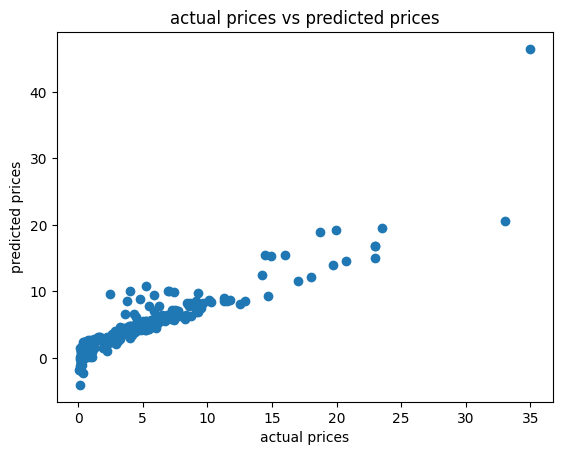

In [35]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted prices")
plt.show()

In [36]:
#prediction on testing data
testing_data_prediction=lass_reg_model.predict(x_test)

In [37]:
#R squared error
error_score=metrics.r2_score(y_test,testing_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.8709167941173195


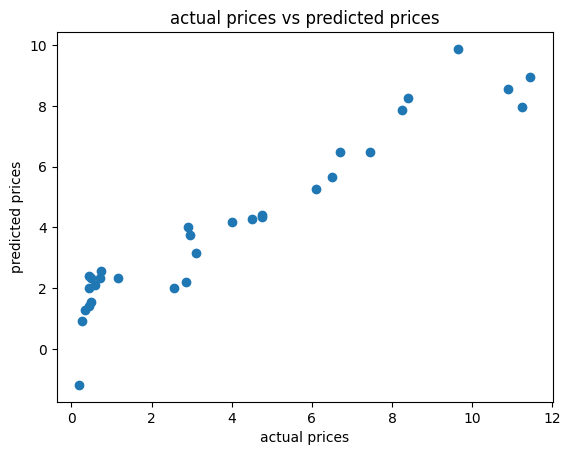

In [38]:
plt.scatter(y_test,testing_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted prices")
plt.show()

here, lasso regression model is better than linear regression model as the points in the scatter graph of lasso regression are much closer.